In [1]:
from wovenv.ai.q_learning import QLearningAgent
from wovenv.venv.env import Env

In [2]:
env = Env()
agent = QLearningAgent(alpha=0.5)

In [3]:
def get_epsilon(play_id):
    return 1 - 0.9 / (1 + play_id ** (-1/2))

In [4]:
MAX_BATCH_SIZE = 1
batch = []

In [5]:
def generate_session(env: Env, agent: QLearningAgent, t_max=1000, train=False):
    total_reward = 0
    s = env.reset()

    for t in range(t_max):
        a = agent.get_action(s)
        next_s, r, done = env.step(a)

        if len(batch) == MAX_BATCH_SIZE:
            batch.pop(0)
        batch.append((s, a, next_s, r, done))

        if train:
            agent.update(batch)

        total_reward += r
        s = next_s
        if done: break

    return total_reward

0.12758808702854396


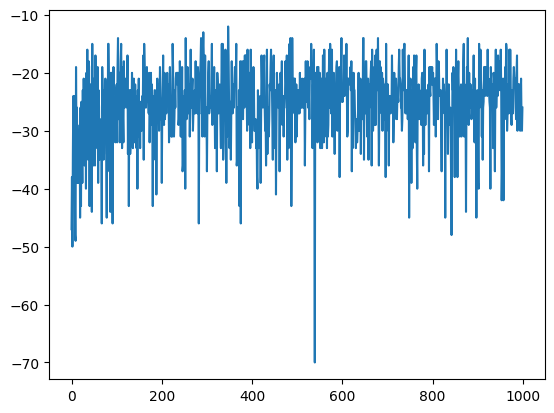

In [6]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

agent.epsilon = 1

rewards = []
for i in range(1000):
    rewards.append(generate_session(env,agent,train=True))
    agent.epsilon = get_epsilon(i + 1)
    if i % 1 == 0:
        clear_output(True)
        print(agent.epsilon)
        plt.plot(rewards)
        plt.show()